<div style='text-align: center;'>
    <img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQzJzIHdangJTrH2mFXFgsLjuLCjpfXXwbxg&usqp=CAU' width='100'/>
    <h1>Sharif University of Technology</h1>
    <h2>Natural Language Processing</h2>
    <h3>Final Project</h3>
    <h4>Spoiler classification and summary generation</h4>
    <p><strong>Authors:</strong> Parnian Razavipour, Mobina Salimipanah</p>
    <p><strong>(Equal Contribution)</strong></p>
</div>
<hr/>


# Dataset Preparation and EDA


In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d rmisra/imdb-spoiler-dataset

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/rmisra/imdb-spoiler-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
100% 330M/331M [00:18<00:00, 23.0MB/s]
100% 331M/331M [00:18<00:00, 19.1MB/s]


In [4]:
!unzip imdb-spoiler-dataset.zip
!ls

Archive:  imdb-spoiler-dataset.zip
  inflating: IMDB_movie_details.json  
  inflating: IMDB_reviews.json       
IMDB_movie_details.json  IMDB_reviews.json  imdb-spoiler-dataset.zip  sample_data


In [5]:
import pandas as pd
reviews_df = pd.read_json('IMDB_reviews.json' , lines=True)
reviews_df.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [6]:
print(f"Total number of rows in the dataset: {reviews_df.shape[0]}")

Total number of rows in the dataset: 573913


In [7]:
import pandas as pd

print("Total reviews:", len(reviews_df))
print("Number of spoiler reviews:", reviews_df['is_spoiler'].sum())
print("Number of non-spoiler reviews:", len(reviews_df) - reviews_df['is_spoiler'].sum())

reviews_df['review_length'] = reviews_df['review_text'].apply(len)
print("Average review length:", reviews_df['review_length'].mean())
print("Median review length:", reviews_df['review_length'].median())

print(reviews_df['is_spoiler'].value_counts(normalize=True))


Total reviews: 573913
Number of spoiler reviews: 150924
Number of non-spoiler reviews: 422989
Average review length: 1460.5535246631457
Median review length: 1052.0
is_spoiler
False    0.737026
True     0.262974
Name: proportion, dtype: float64


In [8]:
reviews_df = reviews_df[:175000]

In [9]:
len(set(reviews_df['movie_id']))

428

In [10]:
reviews_df['review_length'] = reviews_df['review_text'].apply(len)

<ipython-input-10-ad5e2d5c4829>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['review_length'] = reviews_df['review_text'].apply(len)


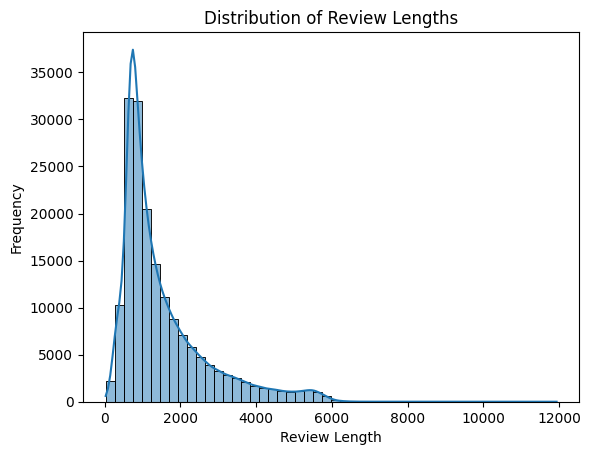

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Review length distribution
sns.histplot(reviews_df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

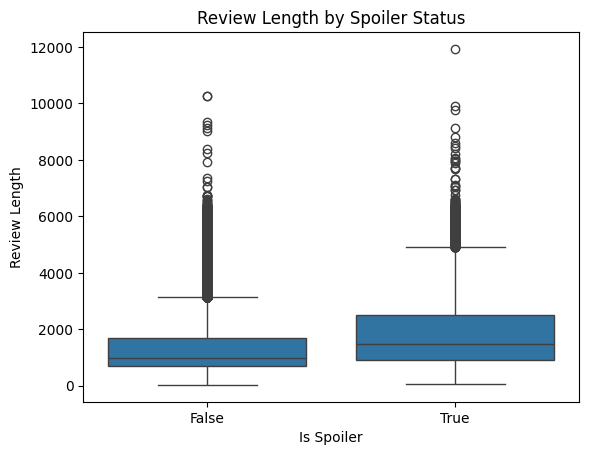

In [12]:
# Box plot for review lengths by spoiler
sns.boxplot(x='is_spoiler', y='review_length', data=reviews_df)
plt.title('Review Length by Spoiler Status')
plt.xlabel('Is Spoiler')
plt.ylabel('Review Length')
plt.show()

In [13]:
data = reviews_df[['review_text', 'is_spoiler']]
data.head()

,review_text,is_spoiler
0,"In its Oscar year, Shawshank Redemption (writt...",True
1,The Shawshank Redemption is without a doubt on...,True
2,I believe that this film is the best story eve...,True
3,"**Yes, there are SPOILERS here**This film has ...",True
4,At the heart of this extraordinary movie is a ...,True


In [15]:
data.shape[0]

175000

In [16]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.replace('\n', ' ')  # Replace newlines with spaces
    text = text.replace('\r', ' ')  # Replace carriage returns with spaces
    text = ''.join([c if c.isalnum() or c.isspace() else ' ' for c in text])  # Remove special characters
    text = ' '.join(text.split())  # Remove extra spaces
    return text

# Apply text cleaning to the dataset
data['review_text'] = data['review_text'].apply(clean_text)


<ipython-input-16-331fbbe8856b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review_text'] = data['review_text'].apply(clean_text)


In [17]:
from sklearn.model_selection import train_test_split
train_data, temp_data = train_test_split(data, test_size=0.25, random_state=42)

# Split the remainder into test and validation sets
test_data, val_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Display the sizes of each dataset
print("Training set size:", len(train_data))
print("Validation set size:", len(val_data))
print("Test set size:", len(test_data))

Training set size: 131250
Validation set size: 21875
Test set size: 21875


In [18]:
from datasets import Dataset
import torch

train_dataset = Dataset.from_pandas(train_data)
val_dataset = Dataset.from_pandas(val_data)
test_dataset = Dataset.from_pandas(test_data)

In [19]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


# Model

In [20]:
!pip install tensorflow
!pip install keras

In [21]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

vocab_size = 8000
max_length = 2000  # Maximum review length
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_data['review_text'])

In [22]:
def tokenize_and_pad(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
    return padded_sequences

In [23]:
X_train = tokenize_and_pad(train_data['review_text'])
X_val = tokenize_and_pad(val_data['review_text'])
X_test = tokenize_and_pad(test_data['review_text'])

y_train = train_data['is_spoiler']
y_val = val_data['is_spoiler']
y_test = test_data['is_spoiler']

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from tensorflow.keras.layers import Bidirectional

model = Sequential([
    Embedding(vocab_size, 32, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),  # Using a bidirectional LSTM
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [25]:
model.build(input_shape=(None, max_length))

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 2000, 32)            │         256,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 2000, 128)           │          49,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2000, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 404,609 (1.54 MB)

 Trainable params: 404,609 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/8
4102/4102 ━━━━━━━━━━━━━━━━━━━━ 1000s 242ms/step - accuracy: 0.7216 - loss: 0.5929 - val_accuracy: 0.7301 - val_loss: 0.5770
Epoch 2/8
4102/4102 ━━━━━━━━━━━━━━━━━━━━ 1042s 243ms/step - accuracy: 0.7339 - loss: 0.5535 - val_accuracy: 0.7552 - val_loss: 0.5142
Epoch 3/8
4102/4102 ━━━━━━━━━━━━━━━━━━━━ 1053s 245ms/step - accuracy: 0.7586 - loss: 0.5097 - val_accuracy: 0.7632 - val_loss: 0.5039
Epoch 4/8
4102/4102 ━━━━━━━━━━━━━━━━━━━━ 1036s 244ms/step - accuracy: 0.7700 - loss: 0.4951 - val_accuracy: 0.7632 - val_loss: 0.5038
Epoch 5/8
4102/4102 ━━━━━━━━━━━━━━━━━━━━ 1051s 246ms/step - accuracy: 0.7813 - loss: 0.4803 - val_accuracy: 0.7639 - val_loss: 0.5083
Epoch 6/8
4102/4102 ━━━━━━━━━━━━━━━━━━━━ 1042s 246ms/step - accuracy: 0.7862 - loss: 0.4705 - val_accuracy: 0.7631 - val_loss: 0.5041
Epoch 7/8
4102/4102 ━━━━━━━━━━━━━━━━━━━━ 1043s 246ms/step - accuracy: 0.7963 - loss: 0.4563 - val_accuracy: 0.7644 - val_loss: 0.5167
Epoch 8/8
4102/4102 ━━━━━━━━━━━━━━━━━━━━ 1043s 247ms/step - ac

In [29]:
# Save the model in HDF5 forma
model.save('my_fine_tuned_model.h5')


In [27]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [30]:
import os

model_path = '/content/drive/MyDrive/LSTMModel'
os.makedirs(model_path, exist_ok=True)


In [31]:
# Save the model in HDF5 format
model.save(os.path.join(model_path, 'my_fine_tuned_model.h5'))



In [ ]:
!nvidia-smi


In [32]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [33]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

684/684 ━━━━━━━━━━━━━━━━━━━━ 71s 104ms/step - accuracy: 0.7551 - loss: 0.5165
Test Loss: 0.5159615874290466
Test Accuracy: 0.7574856877326965


In [34]:
!pip install numpy scikit-learn tensorflow


In [35]:
from tensorflow.keras.models import load_model
model = load_model('my_fine_tuned_model.h5')


In [36]:
from sklearn.metrics import classification_report
import numpy as np

In [37]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Threshold predictions for binary classification


684/684 ━━━━━━━━━━━━━━━━━━━━ 80s 117ms/step


In [38]:
report = classification_report(y_test, predictions, target_names=['Non-Spoiler', 'Spoiler'])
print(report)

              precision    recall  f1-score   support

 Non-Spoiler       0.79      0.91      0.84     15695
     Spoiler       0.62      0.38      0.47      6180

    accuracy                           0.76     21875
   macro avg       0.70      0.64      0.66     21875
weighted avg       0.74      0.76      0.74     21875



In [39]:
!pip install scikit-learn

In [40]:
def prepare_input(text, tokenizer, max_length):
    sequences = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequences, maxlen=max_length, padding='post')
    return padded

def predict_spoiler(text, tokenizer, model, max_length=1500):
    prepared_text = prepare_input(text, tokenizer, max_length)
    prediction = model.predict(prepared_text)
    is_spoiler = (prediction > 0.5).astype(int)  # Threshold the prediction
    return bool(is_spoiler)



In [41]:
# Test the function
input_text = "Jack Ryan is on a working vacation in London with his family. He has retired from the CIA and is a Professor at the US Naval Academy. He is seen delivering a lecture at the Royal Naval Academy in London.Meanwhile, Ryan's wife Cathy and daughter Sally are sightseeing near Buckingham Palace. Sally and Cathy come upon a British Royal Guard, and Sally tries to get the guard to react by doing an improvised tap dance in front of him. She's impressed when the guard, trained to ignore distraction, doesn't react at all, and they leave."
is_spoiler = predict_spoiler(input_text, tokenizer, model)
print(f"The text is a {'spoiler' if is_spoiler else 'non-spoiler'}.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 966ms/step
The text is a non-spoiler.


In [42]:
# Test the function
input_text = "Three years have passed since John Brennan (Russel Crowe) and his wife Lara (Elizabeth Banks) lost their son Luke (Tyler Simpkins) in a car accident. Three years later, John is a community college teacher who is teaching English. He tries to manage his job and raising Luke."
is_spoiler = predict_spoiler(input_text, tokenizer, model)
print(f"The text is a {'spoiler' if is_spoiler else 'non-spoiler'}.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
The text is a non-spoiler.


In [ ]:
# Test the function
input_text = "Three years have passed since John Brennan (Russel Crowe) and his wife Lara (Elizabeth Banks) lost their son Luke (Tyler Simpkins) in a car accident. Three years later, John is a community college teacher who is teaching English. He tries to manage his job and raising Luke."
is_spoiler = predict_spoiler(input_text, tokenizer, model)
print(f"The text is a {'spoiler' if is_spoiler else 'non-spoiler'}.")